# Week 5

# Task 1

In this task you will implement and train a multilayer perceptron (MLP) model using Gradient Descent and Backpropagation algorithms. The model should have 4 neurons with ReLu activation function in the hidden layer (Layer 1) and a single neuron with Sigmoid activation function in the output layer (Layer 2). The MLP will be applied to solve the binary classification problem from the previous practicals.  

**T1.1. Run the below code to load and visualise the data.** 

The first two columns are the feature variables and the last column in the target output.

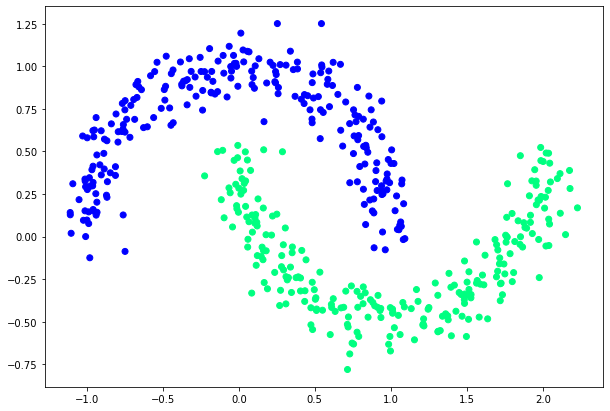

In [125]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets 
import matplotlib.pyplot as plt

x, y = datasets.make_moons(500, noise=0.1)
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.winter)

**T1.2 Split the dataset into test and train set, with the split 0.2 for the test set.**

In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
print(x_train.shape)

(400, 2)


**T1.3 Implement the activation functions and their derivatives.**

In [127]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

In [128]:
def LReLU(x):
    return np.where(x > 0, x, x * 0.01)

def dLReLU(x):
    return np.where(x > 0, 1, 0.01)

**T1.4 Implement loss function and its derivative.**

In [129]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
  return -(y/o - (1-y)/(1-o))

**T1.5 Initialize weights with uniform distribution (-1,1) and biases with zero values.**

Hints:
- The weights of Layer 1 ($w_1$) are represented as a matrix of size [no of inputs, no of neurons in Layer 1] and the bias ($b_1$) is a vector with dimension equals to the number of neurons in Layer 1. 
- The weights of Layer 2 ($w_2$) are represented by a matrix of shape [no of output from Layer 1, no of neurons in Layer 2] and the bias is a vector with dimenssion equals to te number of neurons in Layer 2.

In [130]:
layer_1_size = 4
layer_2_size = 1

In [131]:
w1 = np.random.uniform(-1,1,[x_train.shape[1],layer_1_size])
w2 = np.random.uniform(-1,1,[layer_1_size])

b1 = np.random.uniform(-1,1,[layer_1_size])
b2 = np.random.uniform(-1,1,[layer_2_size])
print(w1.shape, w2.shape, b1.shape, b2.shape)

(2, 4) (4,) (4,) (1,)


**T1.6 Train the Neural Network with Batch GD algorithm and the train set.** 
- Use 0.05 as learning rate.
- Train the model for 1000 epochs.

Hints:
From the lecture we know that:
- Input to Layer 1: $in_1 = x@w_1+b_1$ 
- Output of Layer 1: $o_1=ReLu(in_1)$
- Input to Layer 2: $in_2=o_1@w_2+b_2$
- Output of Layer 2: $o_2 = \frac{1}{1+e^{-in_2}}$ 

Calculating gradients:

$n - $batch size

Layer 2:
$$\frac{\delta E}{\delta w_2} = \frac{\delta E}{\delta o_2}\times\frac{\delta o_2}{\delta in_2}\times\frac{\delta in_2}{\delta w_2} = \frac{1}{n}*o_1.T@(\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2})$$
    
$$\frac{\delta E}{\delta b_2} = \frac{\delta E}{\delta o_2}\times\frac{\delta o_2}{\delta in_2}\times\frac{\delta in_2}{\delta b_2} = \frac{1}{n}*\overrightarrow{1_{[1,n]}}@(\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2})$$

Layer 1:

$$\frac{\delta E}{\delta w_1} = \frac{\delta E}{\delta o_2}\times \frac{\delta o_2}{\delta in_2}\times \frac{\delta in_2}{\delta o_1}\times \frac{\delta o_1}{\delta in_1} \times \frac{\delta in_1}{\delta w_1} = \frac{1}{n}*x_1.T@ (\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2} @ w_2.T)* \frac{\delta o_1}{\delta in_1}$$

$$\frac{\delta E}{\delta b_1} = \frac{\delta E}{\delta o_2}\times \frac{\delta o_2}{\delta in_2}\times \frac{\delta in_2}{\delta o_1}\times \frac{\delta o_1}{\delta in_1} \times \frac{\delta in_1}{\delta b_1} = \frac{1}{n}*\overrightarrow{1_{[1,n]}}@ (\frac{\delta E}{\delta o_2}*\frac{\delta o_2}{\delta in_2} @ w_2.T)* \frac{\delta o_1}{\delta in_1}$$

where:


$\frac{\delta E}{\delta o_2} = \frac{\delta crossEntrop}{\delta o_2}$

$\frac{\delta o_2}{\delta in_2}=\frac{\delta Sigmoid}{\delta in_2}$

$\frac{\delta o_1}{\delta in_1} = \frac{\delta ReLu}{\delta in_1}$

**T1.7 Visualise train and test error and accuracy across the epochs.**

In [132]:
from sklearn import metrics

In [133]:
epochs = 100
lr = 0.05
batch_size = 100

In [134]:
n = len(x_train[1])
train_E = []
test_E = []
train_Acc = []
test_Acc = []
for epoch in range(epochs):
  for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i + batch_size,:]
    y_batch = y_train[i:i + batch_size]
    if b1.shape != [4,]:
      b1 = b1.reshape([4,])
    if w2.shape != [4,]:
      w2 = w2.reshape([4,])
    in1 = x_batch@w1+b1
    out1 = LReLU(in1)
    in2 = out1@w2+b2
    out2 = sigmoid(in2)

    dEdO2 = crossEntrDeriv(out2,y_batch)
    dO2dIn2 = sigmoid_derivative(in2)
    dO1dIn1 = dLReLU(in1)
    
    dEdW2 = 1/n * out1.T@(dEdO2*dO2dIn2)
    dEdB2 = 1/n * np.ones([1,x_batch.shape[0]])@(dEdO2*dO2dIn2)
    
    w2 = w2.reshape(1,w2.shape[0])

    dEdW1 = 1/n * x_batch.T@((np.reshape(dEdO2*dO2dIn2,[batch_size,1])@w2)*dO1dIn1)
    dEdB1 = 1/n * np.ones([1,x_batch.shape[0]])@((np.reshape(dEdO2*dO2dIn2,[batch_size,1])@w2)*dO1dIn1)

    w1 -= lr*dEdW1
    w2 -= lr*dEdW2
    print(b1.shape, (lr*dEdB1[0,:]).shape)
    b1 -= lr*dEdB1[0,:]
    print(b1.shape, (lr*dEdB1[0,:]).shape)
    b2 -= lr*dEdB2

  error_train = crossEntrop(out2,y_batch)
   # error_test = crossEntrop(sigmoid(LReLU(x_test@w1+b1)@w2+b2),y_test)

  train_E.append(error_train.mean())
   # test_E.append(error_test.mean())

  predictions_train = np.where(out2 > 0.5, 1,0)
   # prediction_test = np.where(sigmoid(LReLU(x_test@w1+b1)@w2+b2) > 0.5,1,0)
  train_Acc.append(metrics.accuracy_score(y_batch,predictions_train))
   # test_Acc.append(metrics.accuracy_score(y_test,prediction_test))

#print('Train error: ', metrics.mean_squared_error(sigmoid(LReLU(x_train@w1+b1)@w2+b2),y_train))
#print('Test error: ', metrics.mean_squared_error(sigmoid(LReLU(x_test@w1+b1)@w2+b2),y_test))

(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)
(4,) (4,)


1.0


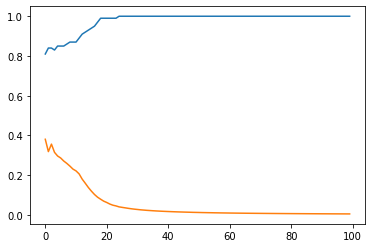

In [135]:
import matplotlib.pyplot as plt

plt.plot(train_Acc)

plt.plot(train_E)
print(train_Acc[-1])

**T1.8 Report the final test accuracy of the model.**

In [136]:
prediction_test = np.where(sigmoid(LReLU(x_test@w1+b1)@w2.T+b2) > 0.5,1,0)
test_Acc.append(metrics.accuracy_score(y_test,prediction_test))

[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]


# Task 2

In this task you should evaluate your model from Task 1 using 10 cross validation using [KFold](https://scikit-learn.org/stable/modules/cross_validation.html). Report the average accuracy of the model accross all folds. You can experiment with different architectures of the Neural Network.

In [137]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

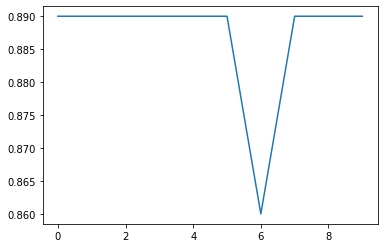

In [138]:
test_Acc = []
for train_index, test_index in kf.split(x):
    w1 = np.random.uniform(-1,1,[x_train.shape[1],layer_1_size])
    w2 = np.random.uniform(-1,1,[layer_1_size])

    b1 = np.random.uniform(-1,1,[layer_1_size])
    b2 = np.random.uniform(-1,1,[layer_2_size])
    for epoch in range(epochs):
        x_batch = x[train_index]
        y_batch = y[train_index]
        if b1.shape != [4,]:
            b1 = b1.reshape([4,])
        if w2.shape != [4,]:
            w2 = w2.reshape([4,])
        in1 = x_batch@w1+b1
        out1 = LReLU(in1)
        in2 = out1@w2+b2
        out2 = sigmoid(in2)

        dEdO2 = crossEntrDeriv(out2,y_batch)
        dO2dIn2 = sigmoid_derivative(in2)
        dO1dIn1 = dLReLU(in1)
        
        dEdW2 = 1/len(dEdO2) * out1.T@(dEdO2*dO2dIn2)
        dEdB2 = 1/len(dEdO2) * np.ones([1,x[train_index].shape[0]])@(dEdO2*dO2dIn2)
        
        w2 = w2.reshape(1,w2.shape[0])

        dEdW1 = 1/n * x_batch.T@((np.reshape(dEdO2*dO2dIn2,[len(dEdO2),1])@w2)*dO1dIn1)
        dEdB1 = 1/n * np.ones([1,x_batch.shape[0]])@((np.reshape(dEdO2*dO2dIn2,[len(dEdO2),1])@w2)*dO1dIn1)

        w1 -= lr*dEdW1
        w2 -= lr*dEdW2
        b1 -= lr*dEdB1[0,:]
        b2 -= lr*dEdB2

        error_train = crossEntrop(out2,y_batch)

    prediction_test = np.where(sigmoid(LReLU(x_test@w1+b1)@w2.T+b2) > 0.5,1,0)
    test_Acc.append(metrics.accuracy_score(y_test,prediction_test))
    
plt.plot(test_Acc)

In [139]:
from scipy.interpolate import make_interp_spline

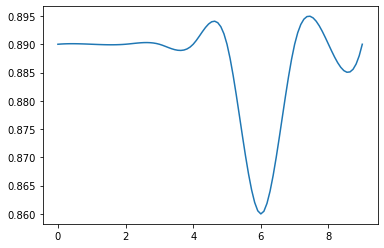

In [147]:
acc_Spline = make_interp_spline(range(len(test_Acc)),test_Acc)
X_ = np.linspace(0, len(test_Acc)-1, len(test_Acc)*10)
Y_ = acc_Spline(X_)
plt.plot(X_, Y_)